In [1]:
import math, copy
import numpy as np
import matplotlib.pyplot as plt
plt.style.use('./deeplearning.mplstyle')
from lab_utils_uni import plt_house_x, plt_contour_wgrad, plt_divergence, plt_gradients

In [2]:
x_train=np.array([1,2])
y_train=np.array([300,500])

In [3]:
def compute_cost(x,y,w,b):
    m=x.shape[0]
    cost_sum=0
    for i in range(m):
        f_wb=w*x[i]+b
        cost_sum+=(f_wb-y[i])**2
    total_sum=(1/(2*m))*cost_sum
    return total_sum

In [80]:
def compute_gradient(x,y,w,b):
    m=x.shape[0]
    dj_dw=0
    dj_db=0
    for i in range(m):
        f_wb=w*x[i]+b
        dj_dw_i=(f_wb-y[i])*x[i]
        dj_db_i=f_wb-y[i]
        dj_dw+=dj_dw_i
        dj_db+=dj_db_i
    dj_dw=dj_dw/m
    dj_db=dj_db/m
    
    return dj_dw,dj_db

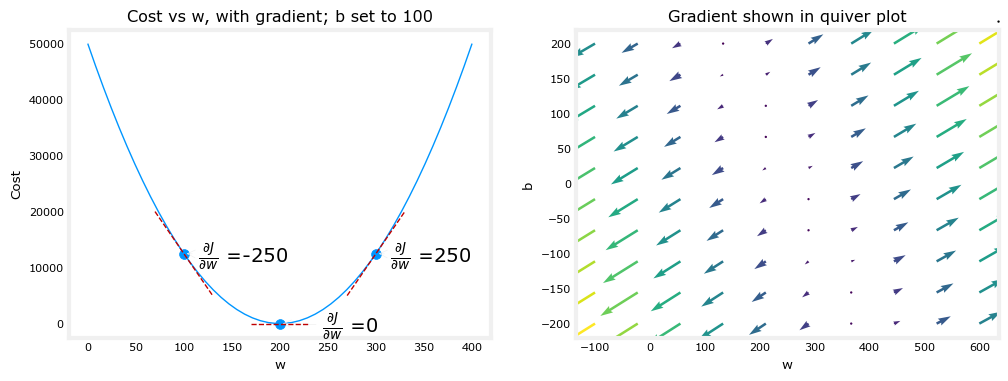

In [81]:
plt_gradients(x_train,y_train,compute_cost,compute_gradient)
plt.show()

In [82]:
def gradient_descent(x,y,w_in,b_in,alpha,num_iters,compute_cost,compute_gradient):
    J_history=[]
    p_history=[]
    w=w_in
    b=b_in
    
    for i in range(num_iters):
        dj_dw,dj_db=compute_gradient(x,y,w,b)
        
        w=w-(alpha*dj_dw)
        b=b-(alpha*dj_db)
        
        if i<100000:
            J_history.append(compute_cost(x,y,w,b))
            p_history.append([w,b])
        
        if i%math.ceil(num_iters/10)==0:
            print(f"Iteration: {i:4} Cost: {J_history[-1]:0.2e} w: {w:0.3e} b: {b:0.5e} dj_dw: {dj_dw:0.3e} dj_db: {dj_db:0.3e} \n")
    
    return w,b,J_history,p_history

In [83]:
w_init=0
b_init=0
iterations=10000
tmp_alpha=1e-2
w_final,b_final,J_hist,p_hist=gradient_descent(x_train,y_train,w_init,b_init,tmp_alpha,iterations,compute_cost,compute_gradient)
print(f"(w,b) found by gradient descent: ({w_final:8.4f}), ({b_final:8.4f})")

Iteration:    0 Cost: 7.93e+04 w: 6.500e+00 b: 4.00000e+00 dj_dw: -6.500e+02 dj_db: -4.000e+02 

Iteration: 1000 Cost: 3.41e+00 w: 1.949e+02 b: 1.08228e+02 dj_dw: -3.712e-01 dj_db: 6.007e-01 

Iteration: 2000 Cost: 7.93e-01 w: 1.975e+02 b: 1.03966e+02 dj_dw: -1.789e-01 dj_db: 2.895e-01 

Iteration: 3000 Cost: 1.84e-01 w: 1.988e+02 b: 1.01912e+02 dj_dw: -8.625e-02 dj_db: 1.396e-01 

Iteration: 4000 Cost: 4.28e-02 w: 1.994e+02 b: 1.00922e+02 dj_dw: -4.158e-02 dj_db: 6.727e-02 

Iteration: 5000 Cost: 9.95e-03 w: 1.997e+02 b: 1.00444e+02 dj_dw: -2.004e-02 dj_db: 3.243e-02 

Iteration: 6000 Cost: 2.31e-03 w: 1.999e+02 b: 1.00214e+02 dj_dw: -9.660e-03 dj_db: 1.563e-02 

Iteration: 7000 Cost: 5.37e-04 w: 1.999e+02 b: 1.00103e+02 dj_dw: -4.657e-03 dj_db: 7.535e-03 

Iteration: 8000 Cost: 1.25e-04 w: 2.000e+02 b: 1.00050e+02 dj_dw: -2.245e-03 dj_db: 3.632e-03 

Iteration: 9000 Cost: 2.90e-05 w: 2.000e+02 b: 1.00024e+02 dj_dw: -1.082e-03 dj_db: 1.751e-03 

(w,b) found by gradient descent: (199.9

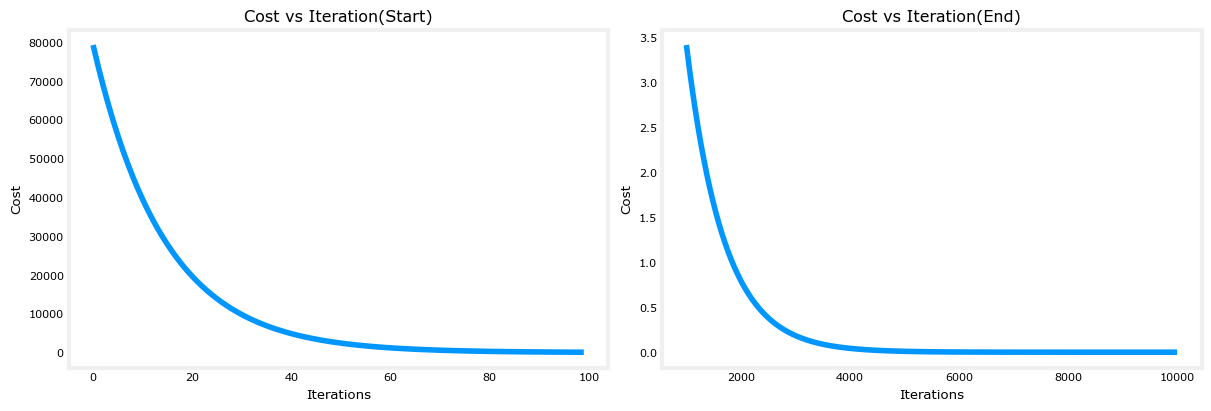

In [84]:
fig,(ax1,ax2)=plt.subplots(1,2,constrained_layout=True,figsize=(12,4))
ax1.plot(J_hist[:100])
ax2.plot(1000+np.arange(len(J_hist[1000:])),J_hist[1000:])
ax1.set_title("Cost vs Iteration(Start)") ; ax2.set_title("Cost vs Iteration(End)")
ax1.set_ylabel("Cost") ; ax2.set_ylabel("Cost")
ax1.set_xlabel("Iterations") ; ax2.set_xlabel("Iterations")
plt.show()

In [85]:
print(f"1000 sqft house prediction {w_final*1.0 + b_final:0.1f} Thousand dollars")
print(f"1200 sqft house prediction {w_final*1.39 + b_final:0.1f} Thousand dollars")
print(f"2000 sqft house prediction {w_final*2 + b_final:0.1f} Thousand dollars")

1000 sqft house prediction 300.0 Thousand dollars
1200 sqft house prediction 378.0 Thousand dollars
2000 sqft house prediction 500.0 Thousand dollars


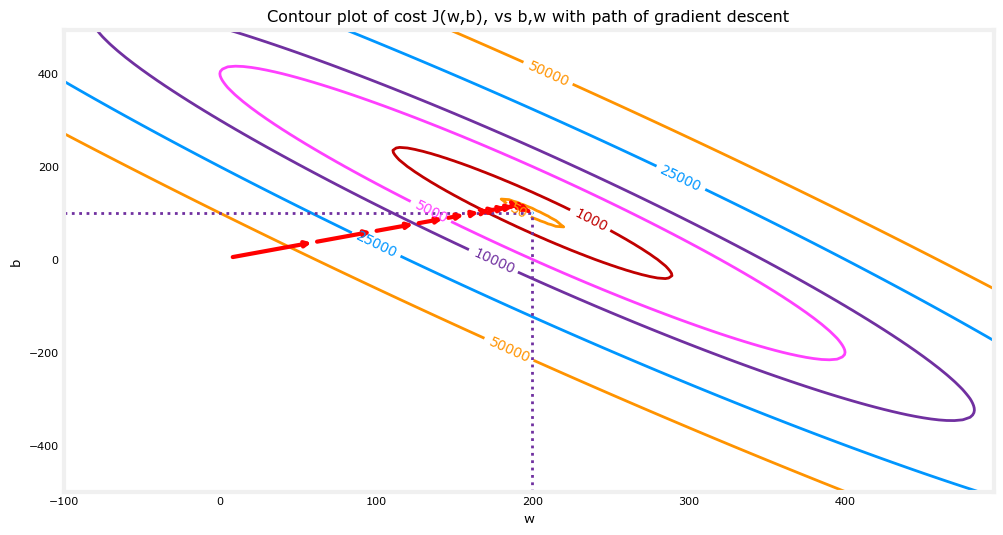

In [86]:
fig,ax=plt.subplots(1,1,figsize=(12,6))
plt_contour_wgrad(x_train, y_train, p_hist, ax)

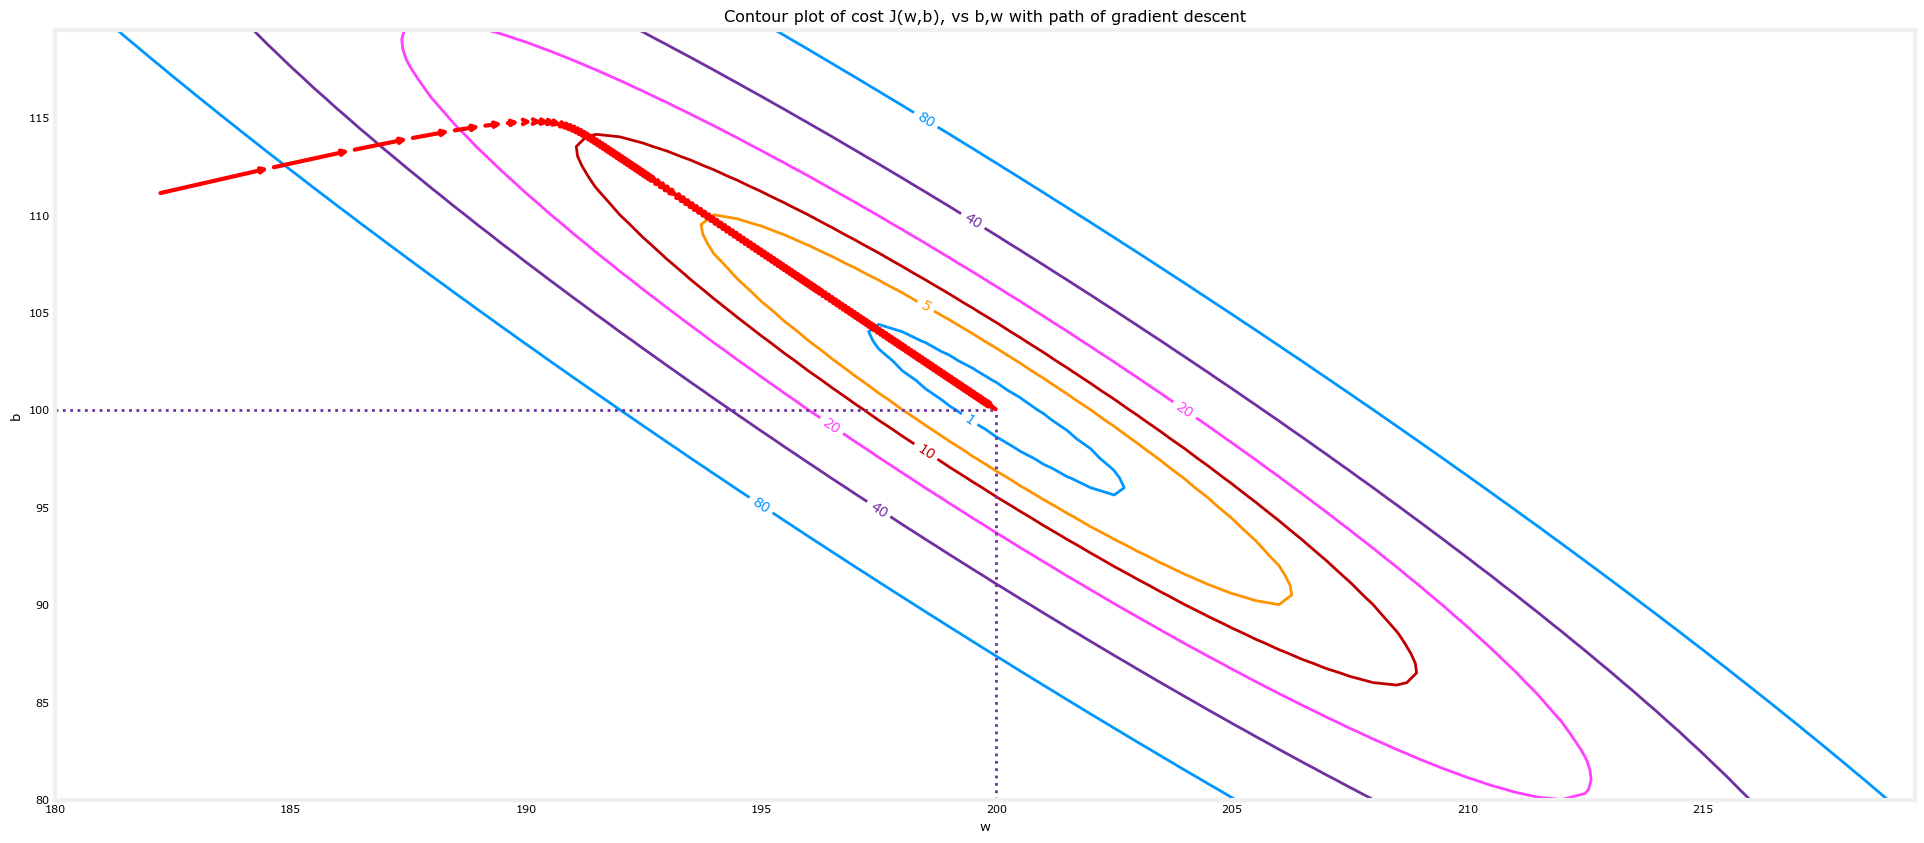

In [87]:
fig, ax = plt.subplots(1,1, figsize=(24, 10))
plt_contour_wgrad(x_train,y_train,p_hist,ax,w_range=[180,220,0.5],b_range=[80,120,0.5],contours=[1,5,10,20,40,80],resolution=0.1)

In [88]:
#setting alpha to large value
w_init = 0
b_init = 0
iterations = 100
tmp_alpha = 8.0e-1
w_final, b_final, J_hist, p_hist = gradient_descent(x_train ,y_train, w_init, b_init, tmp_alpha, 
                                                    iterations, compute_cost, compute_gradient)
print(f"The final value of w and b are: ({w_final:0.2}) ({b_final:0.2e})")

Iteration:    0 Cost: 2.58e+05 w: 5.200e+02 b: 3.20000e+02 dj_dw: -6.500e+02 dj_db: -4.000e+02 

Iteration:   10 Cost: 1.70e+10 w: 8.492e+04 b: 5.24730e+04 dj_dw: -1.667e+05 dj_db: -1.030e+05 

Iteration:   20 Cost: 1.12e+15 w: 2.176e+07 b: 1.34470e+07 dj_dw: -4.281e+07 dj_db: -2.646e+07 

Iteration:   30 Cost: 7.39e+19 w: 5.587e+09 b: 3.45308e+09 dj_dw: -1.099e+10 dj_db: -6.795e+09 

Iteration:   40 Cost: 4.87e+24 w: 1.435e+12 b: 8.86732e+11 dj_dw: -2.823e+12 dj_db: -1.745e+12 

Iteration:   50 Cost: 3.21e+29 w: 3.684e+14 b: 2.27708e+14 dj_dw: -7.250e+14 dj_db: -4.481e+14 

Iteration:   60 Cost: 2.12e+34 w: 9.461e+16 b: 5.84742e+16 dj_dw: -1.862e+17 dj_db: -1.151e+17 

Iteration:   70 Cost: 1.40e+39 w: 2.430e+19 b: 1.50159e+19 dj_dw: -4.781e+19 dj_db: -2.955e+19 

Iteration:   80 Cost: 9.22e+43 w: 6.239e+21 b: 3.85599e+21 dj_dw: -1.228e+22 dj_db: -7.587e+21 

Iteration:   90 Cost: 6.08e+48 w: 1.602e+24 b: 9.90197e+23 dj_dw: -3.153e+24 dj_db: -1.948e+24 

The final value of w and b are

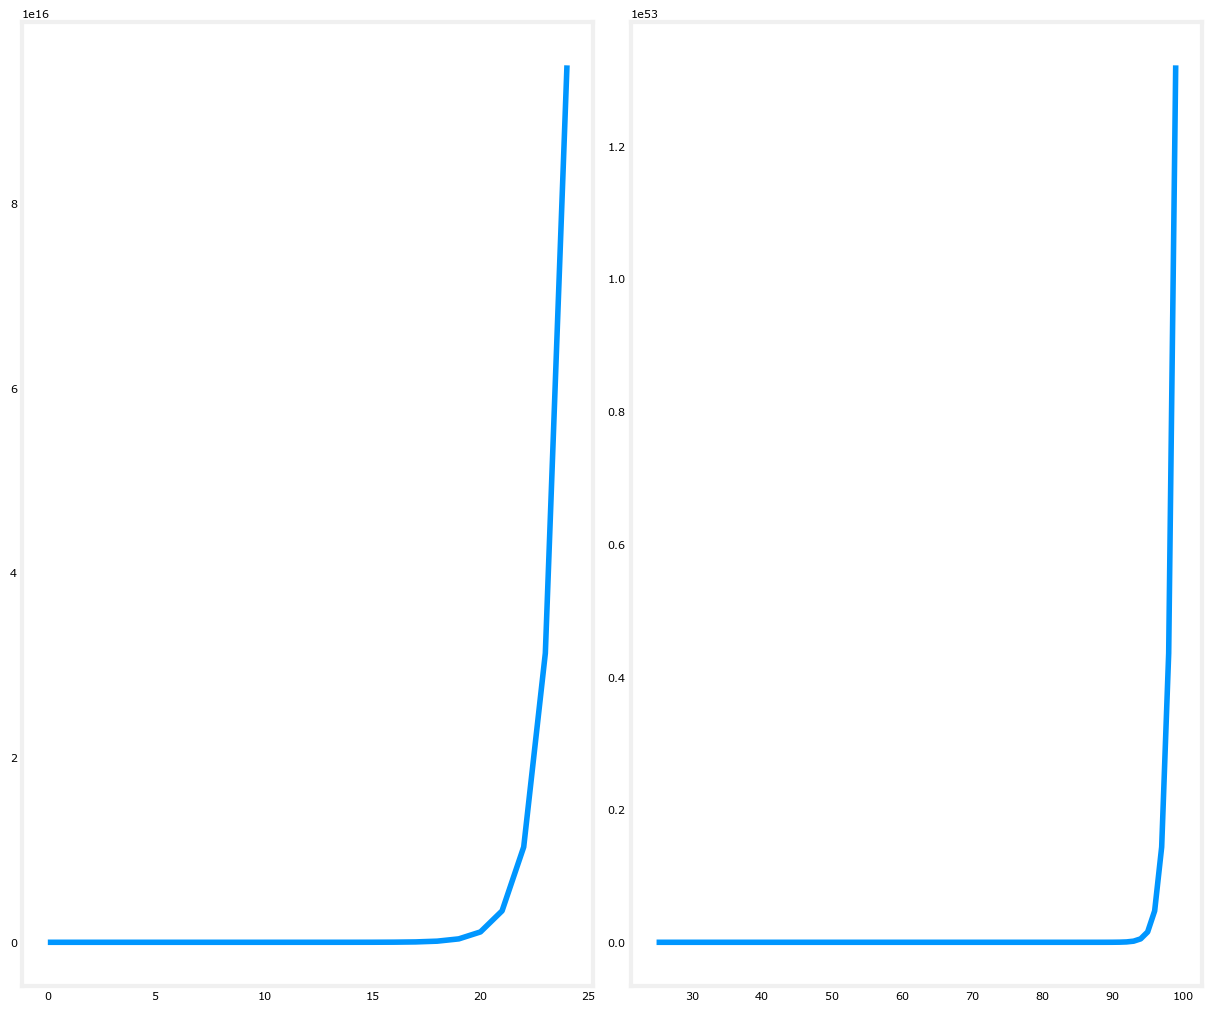

In [89]:
fig, (ax1,ax2)=plt.subplots(1,2,constrained_layout=True,figsize=(12,10))
ax1.plot(J_hist[0:25])
ax2.plot(25+np.arange(len(J_hist[25:])),J_hist[25:])
plt.show()

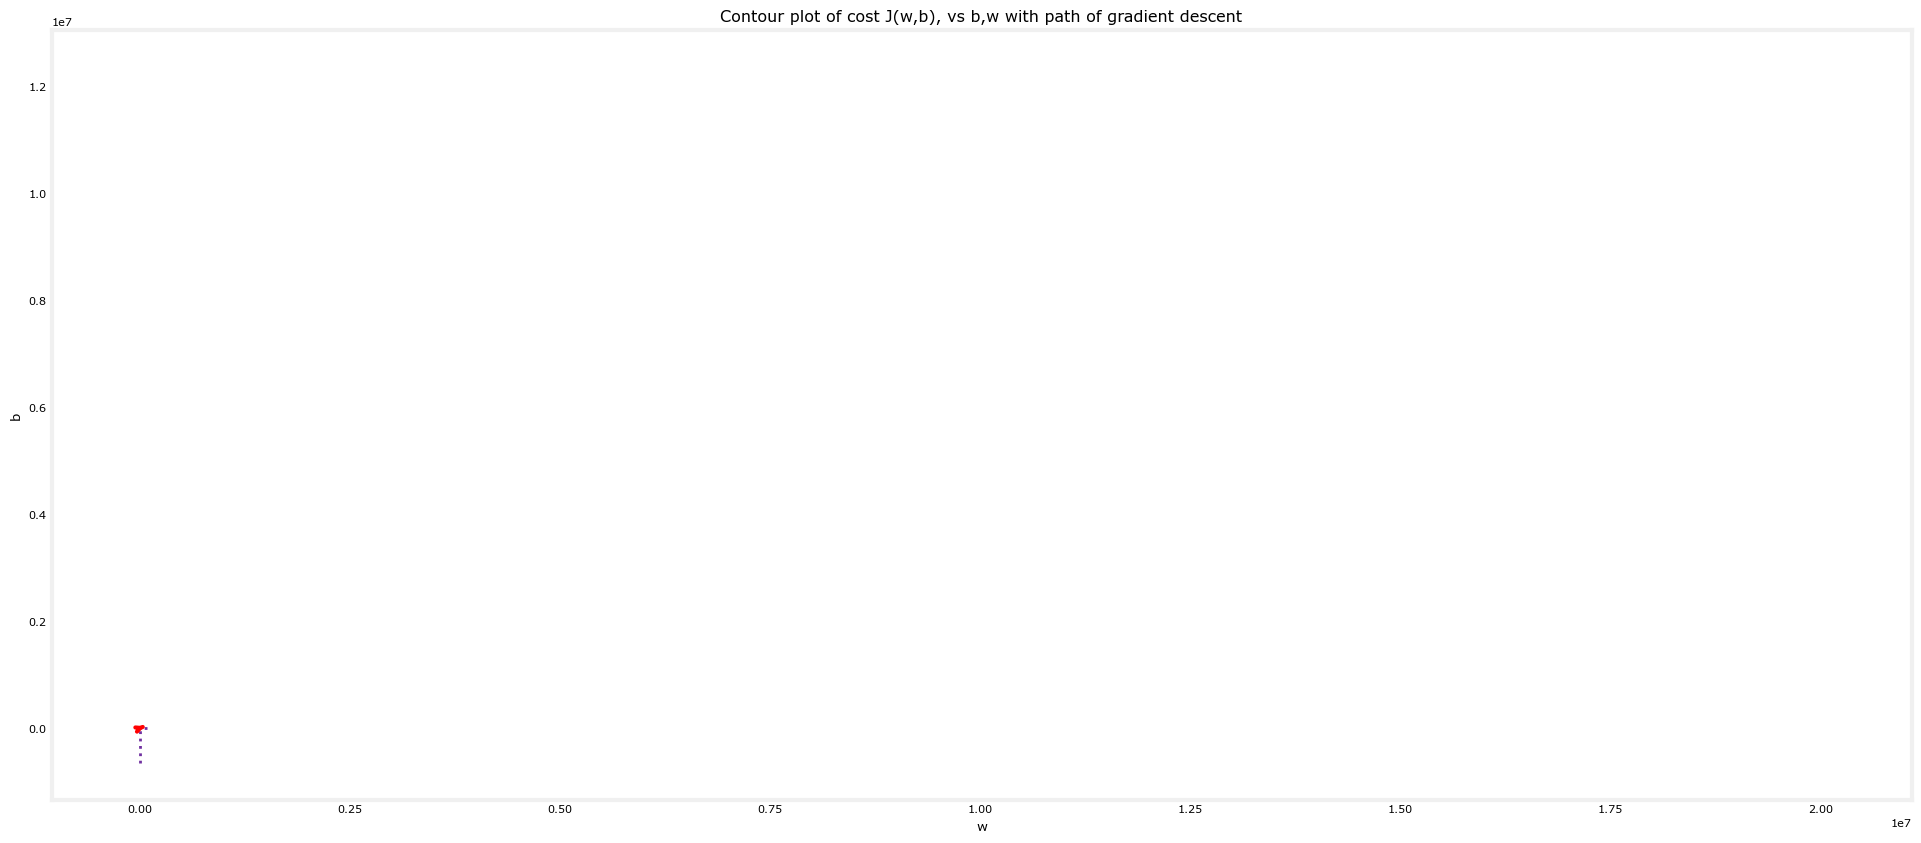

In [90]:
fig, ax = plt.subplots(1,1, figsize=(24, 10))
plt_contour_wgrad(x_train,y_train,p_hist,ax,w_range=[8.492e+04,2.176e+07,1e+6],b_range=[5.24730e+04,1.34470e+07,1e+6],contours=[1,5,10,20,40,80],resolution=0.1)

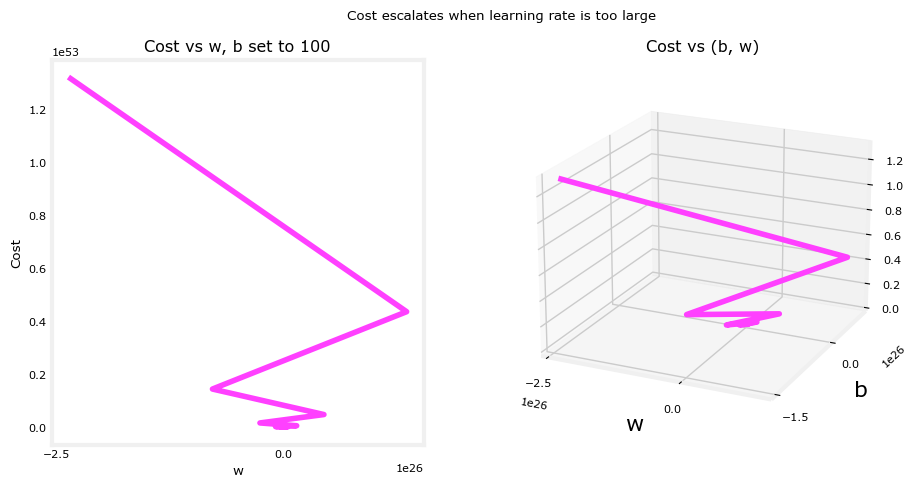

In [91]:
plt_divergence(p_hist,J_hist,x_train,y_train)
plt.show()